
Dataset Information:
  Number of samples: 1500
  2D data shape: (1500, 2)
  Labels shape: (1500,)
  Class 0 samples: 750
  Class 1 samples: 750


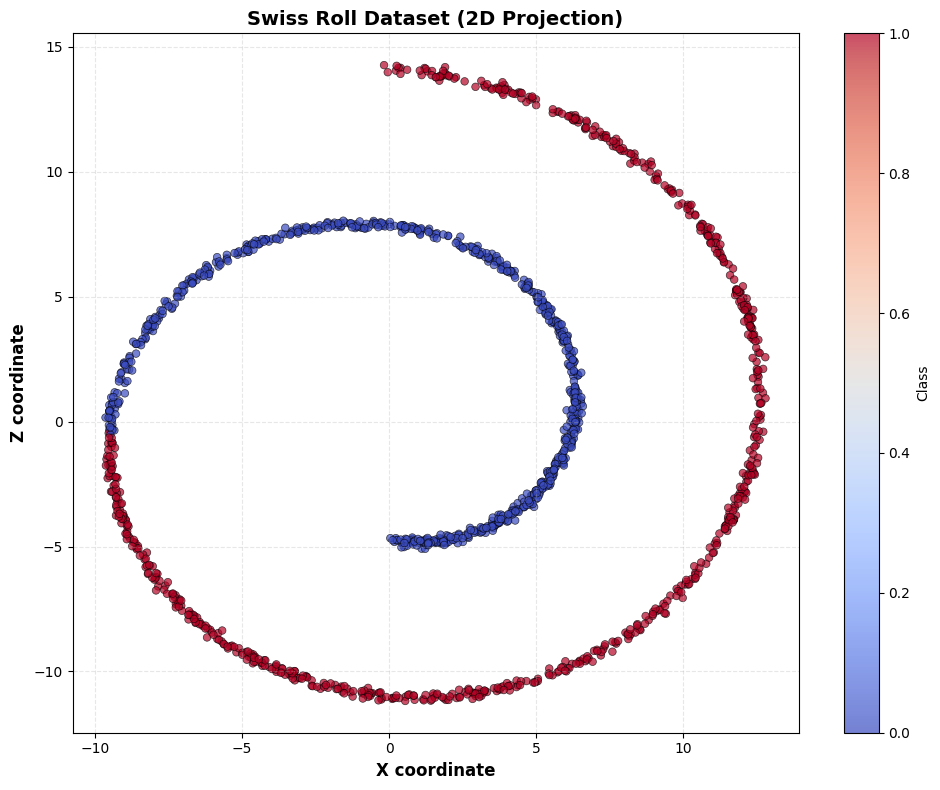

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D
# Generate Swiss Roll data
n_samples = 1500
noise = 0.1

# make_swiss_roll returns 3D data, but we'll use 2D projection
X_3d, t = make_swiss_roll(n_samples=n_samples, noise=noise, random_state=42)

# Extract 2D coordinates (X and Z from the 3D swiss roll)
X_2d = np.column_stack([X_3d[:, 0], X_3d[:, 2]])

# Create binary labels based on the color parameter t
# Split into two classes
y = (t > np.median(t)).astype(int)

print(f"\nDataset Information:")
print(f"  Number of samples: {n_samples}")
print(f"  2D data shape: {X_2d.shape}")
print(f"  Labels shape: {y.shape}")
print(f"  Class 0 samples: {np.sum(y == 0)}")
print(f"  Class 1 samples: {np.sum(y == 1)}")

# Plot 2D Swiss Roll
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='coolwarm', 
                      s=30, alpha=0.7, edgecolors='k', linewidth=0.5)
plt.colorbar(scatter, label='Class')
plt.xlabel('X coordinate', fontsize=12, fontweight='bold')
plt.ylabel('Z coordinate', fontsize=12, fontweight='bold')
plt.title('Swiss Roll Dataset (2D Projection)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


Selecting 3 RBF centers for 3D transformation...

RBF Configuration:
  Number of centers: 3
  Calculated sigma: 12.5940

Transformation Results:
  Original data shape: (1500, 2) (2D)
  Transformed data shape: (1500, 3) (3D)
  Feature range: [0.1892, 1.0000]


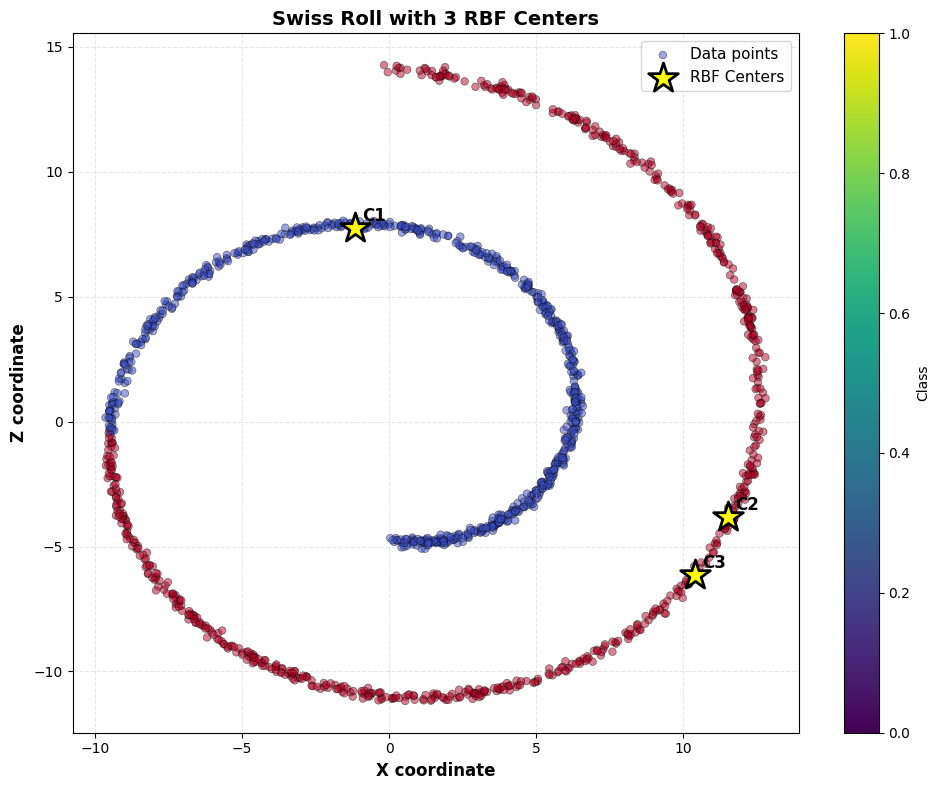

In [14]:
from scipy.spatial.distance import cdist

# Define RBF transformation
def rbf_transform(X, centers, sigma):

    # Calculate pairwise distances between data points and centers
    distances = cdist(X, centers, metric='euclidean')
    
    # Apply Gaussian RBF kernel
    phi = np.exp(-(distances ** 2) / (2 * sigma ** 2))
    
    return phi

# Select 3 RBF centers for 3D visualization
n_centers = 3
print(f"\nSelecting {n_centers} RBF centers for 3D transformation...")

# Choose centers strategically from different regions
# Pick one from each class and one from middle
np.random.seed(42)
class0_indices = np.where(y == 0)[0]
class1_indices = np.where(y == 1)[0]

center1_idx = np.random.choice(class0_indices)  # Center from class 0
center2_idx = np.random.choice(class1_indices)  # Center from class 1
center3_idx = np.random.choice(len(X_2d))       # Random center

centers = X_2d[[center1_idx, center2_idx, center3_idx]]

# Calculate sigma based on distances between centers
dists = cdist(centers, centers, metric='euclidean')
# Use mean of non-zero distances
sigma = np.mean(dists[np.triu_indices_from(dists, k=1)])

print(f"\nRBF Configuration:")
print(f"  Number of centers: {n_centers}")
print(f"  Calculated sigma: {sigma:.4f}")

# Transform data to 3D RBF space
X_rbf_3d = rbf_transform(X_2d, centers, sigma)

print(f"\nTransformation Results:")
print(f"  Original data shape: {X_2d.shape} (2D)")
print(f"  Transformed data shape: {X_rbf_3d.shape} (3D)")
print(f"  Feature range: [{X_rbf_3d.min():.4f}, {X_rbf_3d.max():.4f}]")

# Visualize RBF centers on original 2D data
plt.figure(figsize=(10, 8))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='coolwarm', 
            s=30, alpha=0.5, edgecolors='k', linewidth=0.5, label='Data points')
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', marker='*', 
            s=500, edgecolors='black', linewidth=2, label='RBF Centers', zorder=5)

# Add labels to centers
for i, center in enumerate(centers):
    plt.annotate(f'C{i+1}', xy=center, xytext=(5, 5), 
                textcoords='offset points', fontsize=12, fontweight='bold')

plt.colorbar(label='Class')
plt.xlabel('X coordinate', fontsize=12, fontweight='bold')
plt.ylabel('Z coordinate', fontsize=12, fontweight='bold')
plt.title(f'Swiss Roll with {n_centers} RBF Centers', fontsize=14, fontweight='bold')
plt.legend(fontsize=11, loc='upper right')
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

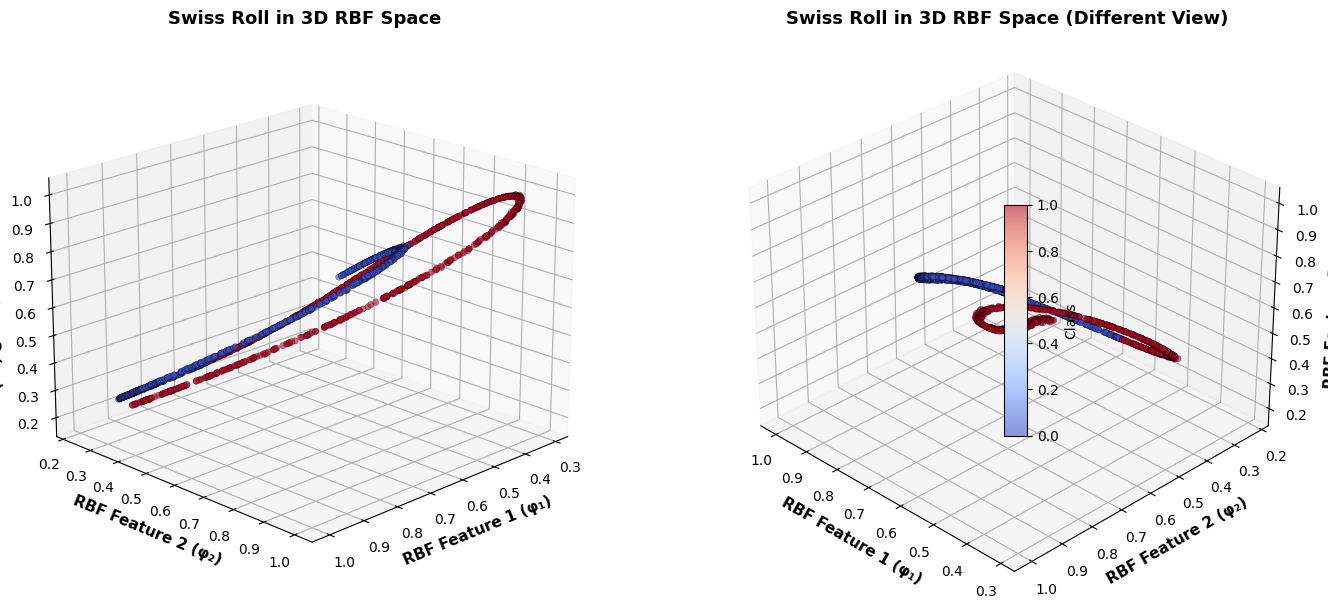


Linear Classifier Performance in RBF Space:
  Accuracy: 89.00%
  Correctly classified: 1335 / 1500

Linear Classifier Performance in Original 2D Space:
  Accuracy: 58.40%
  Correctly classified: 876 / 1500

📊 Improvement: 30.60%


In [15]:
import warnings
warnings.filterwarnings('ignore')
# Create 3D plot
fig = plt.figure(figsize=(14, 6))

# Subplot 1: 3D scatter plot of RBF-transformed data
ax1 = fig.add_subplot(121, projection='3d')

scatter = ax1.scatter(X_rbf_3d[:, 0], X_rbf_3d[:, 1], X_rbf_3d[:, 2], 
                     c=y, cmap='coolwarm', s=20, alpha=0.6, edgecolors='k', linewidth=0.3)

ax1.set_xlabel('RBF Feature 1 (φ₁)', fontsize=11, fontweight='bold')
ax1.set_ylabel('RBF Feature 2 (φ₂)', fontsize=11, fontweight='bold')
ax1.set_zlabel('RBF Feature 3 (φ₃)', fontsize=11, fontweight='bold')
ax1.set_title('Swiss Roll in 3D RBF Space', fontsize=13, fontweight='bold')
ax1.view_init(elev=20, azim=45)

# Subplot 2: Another view
ax2 = fig.add_subplot(122, projection='3d')

scatter2 = ax2.scatter(X_rbf_3d[:, 0], X_rbf_3d[:, 1], X_rbf_3d[:, 2], 
                      c=y, cmap='coolwarm', s=20, alpha=0.6, edgecolors='k', linewidth=0.3)

ax2.set_xlabel('RBF Feature 1 (φ₁)', fontsize=11, fontweight='bold')
ax2.set_ylabel('RBF Feature 2 (φ₂)', fontsize=11, fontweight='bold')
ax2.set_zlabel('RBF Feature 3 (φ₃)', fontsize=11, fontweight='bold')
ax2.set_title('Swiss Roll in 3D RBF Space (Different View)', fontsize=13, fontweight='bold')
ax2.view_init(elev=30, azim=135)

# Add colorbar
fig.colorbar(scatter2, ax=[ax1, ax2], label='Class', shrink=0.5, aspect=10)

plt.tight_layout()
plt.show()


# Train a simple linear classifier in RBF space
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train logistic regression (linear classifier) on RBF features
clf = LogisticRegression(random_state=42, max_iter=1000)
clf.fit(X_rbf_3d, y)

# Predict
y_pred = clf.predict(X_rbf_3d)
accuracy = accuracy_score(y, y_pred)

print(f"\nLinear Classifier Performance in RBF Space:")
print(f"  Accuracy: {accuracy * 100:.2f}%")
print(f"  Correctly classified: {np.sum(y_pred == y)} / {len(y)}")

# Compare with linear classifier on original 2D data
clf_2d = LogisticRegression(random_state=42, max_iter=1000)
clf_2d.fit(X_2d, y)
y_pred_2d = clf_2d.predict(X_2d)
accuracy_2d = accuracy_score(y, y_pred_2d)

print(f"\nLinear Classifier Performance in Original 2D Space:")
print(f"  Accuracy: {accuracy_2d * 100:.2f}%")
print(f"  Correctly classified: {np.sum(y_pred_2d == y)} / {len(y)}")

print(f"\nImprovement: {(accuracy - accuracy_2d) * 100:.2f}%")